# Project 3 - Mayfly Model

## Introduction

**Mayflies** are insects that has a very interesting cycle of life. Depending on the species, they spend a year or more at the bottom of a river, then for over a few days, they mate and lay eggs outside of the river and die. More information on [mayflies](https://en.wikipedia.org/wiki/Mayfly) here. Based on this cycle of life, we can consider it that only one generation of mayflies are alive at any time.

Using this information, we can predict the population of mayflies by using the previous population.

One way of looking at this growth rate is if the mayflies always lay the same amount of eggs. So this represents a **constant** growth rate, such that if this constant is bigger than 1, then the mayfly population grows per generation. If this constant is less than 1, then the mayfly population decays per generation.

It can be represented by the following formula,

$$x_n = a(x_{n-1})$$

$x_n$ represents the population of mayflies of year n

a is the constant growth / decay rate

$x_{n-1}$ represents the previous population of the mayflies of year n, so basically year (n-1)

The function `mayflyConstant` below represents this constant growth / decay of the mayfly population

In [1]:
def mayflyConstant(y0,a,N):   #define the constantmayfly function, gives populations of mayflies by taking in three parameters
    ylist = [y0]              #starting population in list as first element
    for n in range(N):        #for every instance of time up to N, loops through
        ylist.append(ylist[-1]*a)   #appends the previous population times growth/decay rate
    return ylist                    #returns list of populations

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

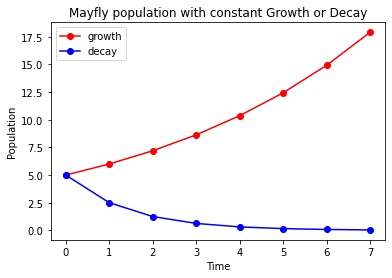

In [3]:
y0 = 5             # initial population
growthRate = 1.2      # growth rate
N = 7              # number of time slices to model
decayRate = 0.5     # decay rate

growthlist = mayflyConstant(y0,growthRate,N)    #growthlist using a constant growth rate (a > 1)

decaylist = mayflyConstant(y0,decayRate,N)      #decaylist using a constant decay rate (a > 1)


plt.figure()

plt.plot(growthlist,'r-o',label='growth') #plots growthlist with red line and dots
plt.plot(decaylist,'b-o',label ='decay')  #plots decaylist with blue line and dots
plt.xlabel('Time')         #x axis labeled as time
plt.ylabel('Population')   #y axis labeled as population
plt.title('Mayfly population with constant Growth or Decay')
plt.legend()

You can see that the graph for both growth and decay are exponentials. This is the simpliest representation of the mayfly populations since growth/decay rate are constant.

Another way to represent mayfly populations is by considering the amount of mayflies that the environment can provide for. This considers space, food, water, and other conditions that must be reached in order for the mayflies to have this cycle. So, the growth rate should go to 0 when the population increases to this **maximal** amount of mayflies that the environment can provide for. 

This can be represented by the following formula, 

$$x_n = a(M - x_{n-1})x_{n-1} $$

a represents the growth rate

M represents the maximal population

$x_n$ represents the population of mayflies of year n

$x_{n-1}$ represents the previous population of the mayflies of year n, so basically year (n-1)

We can then simplify it by substituting in $y_n = \frac{x_n}{M}$ and b = aM,

We can get the following equation,

$$y_n = b(1 - y_{n-1})y_{n-1} $$

This will be the equation that we will focus on to represent the population of mayflies within this project

In [4]:
%matplotlib notebook 

First, we must define this equation above in terms of a function.

Below, `mayfly(y0,b,N)` gives us the population of mayflies by taking in three parameters

**y0** represents the initial population

**b** represents the growth rate

**N** represents the number of time slices to model

In [5]:
def mayfly(y0,b,N):          #define mayfly function, gives populations of mayflies by taking in three parameters
    ylist = [y0]             #starts off with initial population
    for n in range(N):       #for every instance of time up to N, loops through
        y_old = ylist[-1]    #stores last element in list to y_old
        y_new = b*(1-y_old)*y_old  #applies mayfly model equation and stores into y_new
        ylist.append(y_new)        #adds that variable y_new into list instantiated before (ylist)
    return ylist             #returns ylist

This is a example of how to use the `mayfly` function

In [6]:
y0 = .2             # initial population
b = 3.2             # growth rate
N = 20              # number of time slices to model

rlist = mayfly(y0,b,N)

for r in rlist: #just makes rlist look easier to read by printing out each element in rlist
    print(r)

0.2
0.5120000000000001
0.7995392
0.512884056522752
0.7994688034800593
0.5130189943751091
0.7994576185134749
0.5130404310855622
0.7994558309027288
0.5130438570827403
0.7994555449356961
0.5130444051432489
0.7994554991822681
0.5130444928303957
0.7994554918617529
0.513044506860274
0.7994554906904713
0.5130445091050531
0.7994554905030662
0.5130445094642178
0.7994554904730815


We can see from this simple example with initial population being 0.2 and the growth rate being 3.2, it starts off growing, then hits the maximal population then keeps on flucuating.

We can further represent this by graphing it using `matplotlib` as shown below

<IPython.core.display.Javascript object>


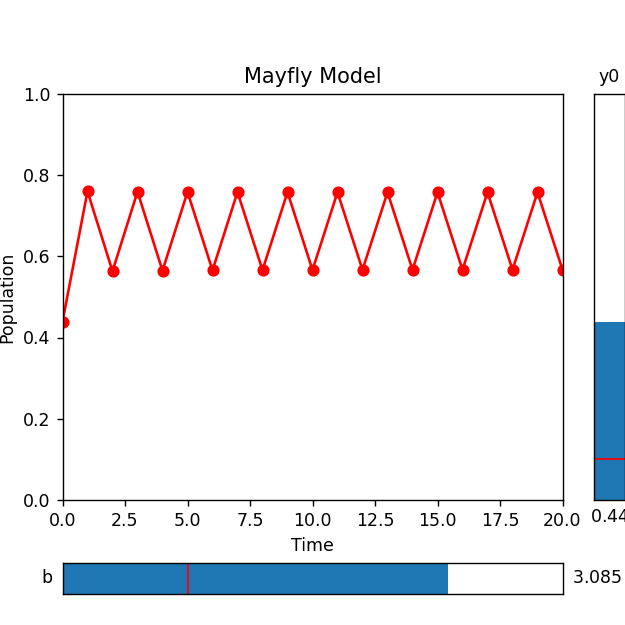

In [7]:
from matplotlib.widgets import Slider  # import the Slider widget

import numpy as np
import matplotlib.pyplot as plt
from math import pi

N = 20

b_min = 0    # the minimial value of the paramater b
b_max = 4   # the maximal value of the paramater b
b_init = 1   # the value of the parameter b to be used initially, when the graph is created

y_nmin = 0      #y_n population minimum
y_nmax = 1      #y_n population maximum

time_min = 0    #time minimum
time_max = N    #time maximum

y_min = 0    # the minimial value of the paramater y
y_max = 1   # the maximal value of the paramater y
y_init = 0.1   # the value of the parameter y to be used initially, when the graph is created

ylist = mayfly(y_init, b_init, 20)      #initial mayfly model with default values

fig = plt.figure(figsize=(5,5))

# first we create the general layount of the figure
# with two axes objects: one for the plot of the function
# and the other for the slider
target_ax = plt.axes([0.1, 0.2, 0.8, 0.65])
b_slider_ax = plt.axes([0.1, 0.05, 0.8, 0.05])
y_slider_ax = plt.axes([0.95, .2, 0.05, 0.65])


# in plot_ax we plot the function with the initial value of the parameter a
plt.axes(target_ax) # 
plt.title('Mayfly Model')
target_plot, = plt.plot(ylist, 'r-o') #plots ylist which is the mayfly model

plt.xlabel('Time')                  #x axis labels
plt.ylabel('Population')            #y axis labels

plt.xlim(time_min, time_max)        #x axis values shown in graph
plt.ylim(y_nmin, y_nmax)            #y axis values shown in graph

# here we create the slider
b_slider = Slider(b_slider_ax,      # the axes object containing the slider
                  'b',            # the name of the slider parameter
                  b_min,          # minimal value of the parameter
                  b_max,          # maximal value of the parameter
                  valinit=b_init  # initial value of the parameter
                 )

y_slider = Slider(y_slider_ax,      # the axes object containing the slider
                  'y0',            # the name of the slider parameter
                  y_min,          # minimal value of the parameter
                  y_max,          # maximal value of the parameter
                  valinit=y_init, # initial value of the parameter
                  orientation='vertical'    #makes slider vertical
                 )

# Next we define a function that will be executed each time the value
# indicated by the slider changes. The variable of this function will
# be assigned the value of the slider.
def update(a):
    ylist = mayfly(y_slider.val, b_slider.val, N) #update mayfly ylist when value of either slider changes
    target_plot.set_ydata(ylist) # set new y-coordinates of the plotted points
    fig.canvas.draw_idle()          # redraw the plot

# the final step is to specify that the slider needs to
# execute the above function when its value changes
b_slider.on_changed(update)
y_slider.on_changed(update)

plt.show()

This gives us a graph that we can play around with by using sliders to change the b and $y_0$ values. For default values, I chose $y_0$ = 0.1 and b = 1.

As we can see, if we adjust b to be less than 1, the population will have a decay rate, while if it's greater than 1, it starts off as a growth rate then stabilizes (if we don't change the $y_0$.

However, if we play around with it and have the inital population ($y_0$) very high and the growth rate (b) at around 1 or a little bit higher, it skyrockets down. This could be because it hits the maximal and the growth rate is too low for it to instantly restore the population. Then it goes up and stablizes.

For example,

<IPython.core.display.Javascript object>


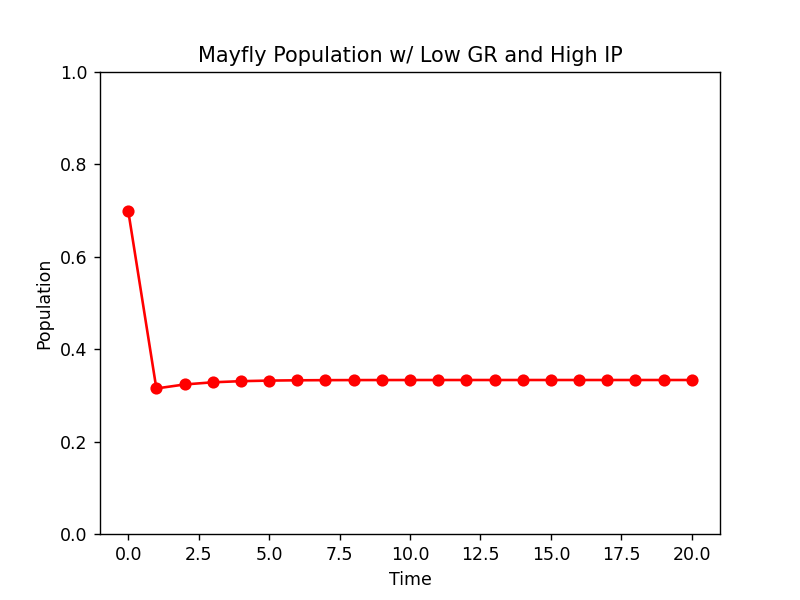

(0.0, 1.0)

In [8]:
y0 = .7             # initial population
b = 1.5             # growth rate
N = 20              # number of time slices to model

glist = mayfly(y0,b,N)

plt.figure()

plt.plot(glist,'r-o')
plt.title('Mayfly Population w/ Low GR and High IP')
plt.xlabel('Time')
plt.ylabel('Population')

plt.ylim(0,1)

Another example can be if b is very high and $y_0$ is fairly small at around 0.1. It skyrockets up then flucuates up and down. This can because it has low initial population and the growth rate is high, it hits the maximal population and then stabilizes by having radical spikes up and down. This is because it hits the maximal population and decreases drastically, then since the growth rate is high, it grows right back to the maximal. This then repeats continuously.

For example,

<IPython.core.display.Javascript object>


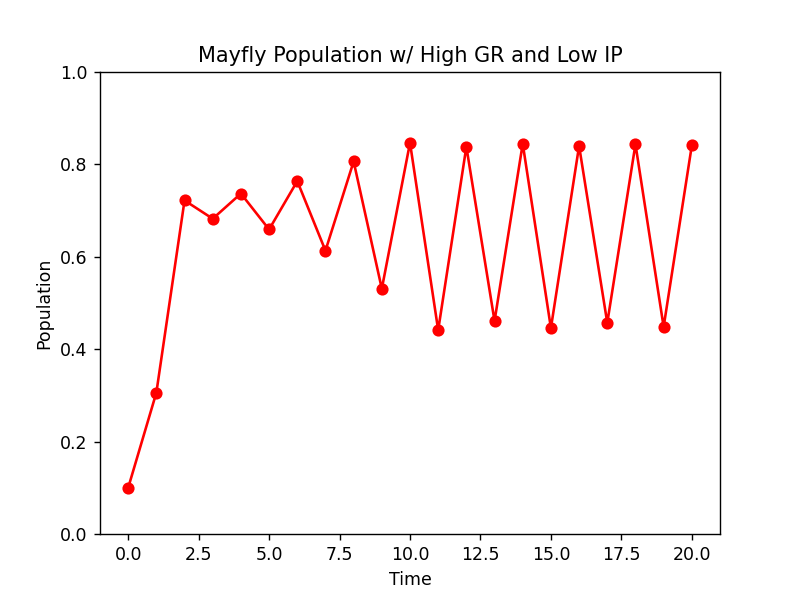

(0.0, 1.0)

In [9]:
y0 = .1             # initial population
b = 3.4             # growth rate
N = 20              # number of time slices to model

glist = mayfly(y0,b,N)

plt.figure()

plt.plot(glist,'r-o')
plt.title('Mayfly Population w/ High GR and Low IP')
plt.xlabel('Time')
plt.ylabel('Population')

plt.ylim(0,1)

# Conclusion

As we can see from these examples, that this represents the population of mayflies fairly well since it takes account of how creatures have to compete for resources in addition by taking in consideration its very interesting life cycle. The future populations of mayflies are directly related to the previous population count. So, if the rate is decaying, then the population will decrease as time approaches 0. $y_0$ wouldn't really have a change in this fact except it just decaying from a higher or lower inital population. On the other hand, if the growth is increasing, $y_0$ would have a greater impact since it shows how close the population will be to the maximal population that the environment can provide for these mayflies. The growth rate being low or high will also have an impact on the flucuations of the graph. A high growth rate will make the flucuations greater since it hits the maximal population extremely fast then drops drastically, then increases again quickly. This pattern repeats for any time. While having a middle of both b and $y_0$ (2 and 0.5 respectively) would just make a straight line since it'll be dying out and laying eggs at same rate. We can check these examples easily by using the sliders created.